# Binarization

In [ ]:
library(loadeR)
library(transformeR)
library(visualizeR)

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"

Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.


## Import Data

In [1]:
pr <- readRDS("../pr_season_year.rds")
tmax <- readRDS("../tmax_season_year.rds")

In [ ]:
# pr10 <- readRDS("../1_quantiles/pr10.rds")
tmax90 <- readRDS("../1_quantiles/tmax90.rds")
pr10_h <- readRDS("../1_quantiles/pr10_h.rds")

## Binarization Function

In [6]:
binarization <- function(grid_data, quantile, variable) {
# Iterate over the years in the data grid
  for (year in names(grid_data)) {
    # Iterate over the seasons of each year
    for (season in names(grid_data[[year]])) {
      # Get current station data
      season_data <- grid_data[[year]][[season]]
      season_quantile <- quantile[[season]]
      
      # Dimension of the data
      dims <- dim(season_data$Data)
      # Iterate over dimensions and convert to binary
      for (a in 1:dims[1]) {
        for (i in 1:dims[2]) {
          for (j in 1:dims[3]) {
            if (!is.na(season_data$Data[a, i, j]) && !is.na(season_quantile$Data[1, i, j])) {
              # If it is precipitation
              if(variable == "pr"){
                if (season_data$Data[a, i, j] < season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              # If it is tmax
              } else if (variable == "tmax"){
                if (season_data$Data[a, i, j] > season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              }
            }
          }
        }
      }
      
      # Actualizar el grid de datos con la estación binarizada
      grid_data[[year]][[season]] <- season_data
    }
  }
  
  # Devolver el grid de datos binarizado
  return(grid_data)
}

## Binarization (Numbers)

In [10]:
binarization_number <- function(grid_data, pr, tmax, variable) {
# Iterate over the years in the data grid
  for (year in names(grid_data)) {
    # Iterate over the seasons of each year
    for (season in names(grid_data[[year]])) {
      # Get current station data
      season_data <- grid_data[[year]][[season]]
      
      # Dimension of the data
      dims <- dim(season_data$Data)
      # Iterate over dimensions and convert to binary
      for (a in 1:dims[1]) {
        for (i in 1:dims[2]) {
          for (j in 1:dims[3]) {
            if (!is.na(season_data$Data[a, i, j])) {
              # If it is precipitation
              if(variable == "pr"){
                if (season_data$Data[a, i, j] < pr) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              # If it is tmax
              } else if (variable == "tmax"){
                if (season_data$Data[a, i, j] > tmax) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              }
            }
          }
        }
      }
      
      # Actualizar el grid de datos con la estación binarizada
      grid_data[[year]][[season]] <- season_data
    }
  }
  
  # Devolver el grid de datos binarizado
  return(grid_data)
}

## Binarization(Reverse)

In [4]:
binarization <- function(grid_data, quantile, variable) {
# Iterate over the years in the data grid
  for (season in names(grid_data)) {
    # Iterate over the seasons of each year
    for (year in names(grid_data[[season]])) {
      # Get current station data
      season_data <- grid_data[[season]][[year]]
      season_quantile <- quantile[[season]]

      # Dimension of the data
      dims <- dim(season_data$Data)
    # Iterate over dimensions and convert to binary
      for (a in 1:dims[1]) {
        for (i in 1:dims[2]) {
          for (j in 1:dims[3]) {
            if (!is.na(season_data$Data[a, i, j]) && !is.na(season_quantile$Data[1, i, j])) {
              # If it is precipitation
              if(variable == "pr"){
                if (season_data$Data[a, i, j] < season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              # If it is tmax
              } else if (variable == "tmax"){
                if (season_data$Data[a, i, j] > season_quantile$Data[1, i, j]) {
                  season_data$Data[a, i, j] <- 1
                } else {
                  season_data$Data[a, i, j] <- 0
                }
              }
            }
          }
        }
      }
      
      # Actualizar el grid de datos con la estación binarizada
      grid_data[[season]][[year]] <- season_data
    }
  }
  
  # Devolver el grid de datos binarizado
  return(grid_data)
}

In [6]:
temperatura <- binarization(tmax, tmax90, "tmax")

In [5]:
temperatura$Winter <- temperatura$Winter[-1]

In [3]:
temperatura <- readRDS("tmaxima.rds")

In [6]:
str(temperatura)

List of 4
 $ Winter:List of 44
  ..$ 1972:List of 4
  .. ..$ Variable:List of 2
  .. .. ..$ varName: chr "tasmax"
  .. .. ..$ level  : NULL
  .. .. ..- attr(*, "use_dictionary")= logi FALSE
  .. .. ..- attr(*, "description")= chr "2-meter maximum daily air temperature"
  .. .. ..- attr(*, "units")= chr "degree_Celsius"
  .. .. ..- attr(*, "longname")= chr "tasmax"
  .. .. ..- attr(*, "daily_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "monthly_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "verification_time")= chr "none"
  .. .. ..- attr(*, "subset")= chr "time"
  .. ..$ Data    : num [1:91, 1:79, 1:137] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  .. .. ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
  .. ..$ xyCoords:List of 2
  .. .. ..$ x: num [1:137] -9.5 -9.4 -9.3 -9.2 -9.1 -9 -8.9 -8.8 -8.7 -8.6 ...
  .. .. ..$ y: num [1:79] 36 36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9 ...
  .. .. ..- attr(*, "projection")= chr "LatLonProjection"
  .. .. ..- attr(*, "resX")= num 0.1

In [18]:
w_total <- list(Winter = w_t, Spring = w_s)

In [19]:
str(w_total)

List of 2
 $ Winter:List of 45
  ..$ 1971:List of 4
  .. ..$ Variable:List of 2
  .. .. ..$ varName: chr "tasmax"
  .. .. ..$ level  : NULL
  .. .. ..- attr(*, "use_dictionary")= logi FALSE
  .. .. ..- attr(*, "description")= chr "2-meter maximum daily air temperature"
  .. .. ..- attr(*, "units")= chr "degree_Celsius"
  .. .. ..- attr(*, "longname")= chr "tasmax"
  .. .. ..- attr(*, "daily_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "monthly_agg_cellfun")= chr "none"
  .. .. ..- attr(*, "verification_time")= chr "none"
  .. .. ..- attr(*, "subset")= chr "time"
  .. ..$ Data    : num [1:59, 1:79, 1:137] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  .. .. ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
  .. ..$ xyCoords:List of 2
  .. .. ..$ x: num [1:137] -9.5 -9.4 -9.3 -9.2 -9.1 -9 -8.9 -8.8 -8.7 -8.6 ...
  .. .. ..$ y: num [1:79] 36 36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9 ...
  .. .. ..- attr(*, "projection")= chr "LatLonProjection"
  .. .. ..- attr(*, "resX")= num 0.1

In [12]:
str(w_total)

List of 90
 $ :List of 4
  ..$ Variable:List of 2
  .. ..$ varName: chr "tasmax"
  .. ..$ level  : NULL
  .. ..- attr(*, "use_dictionary")= logi FALSE
  .. ..- attr(*, "description")= chr "2-meter maximum daily air temperature"
  .. ..- attr(*, "units")= chr "degree_Celsius"
  .. ..- attr(*, "longname")= chr "tasmax"
  .. ..- attr(*, "daily_agg_cellfun")= chr "none"
  .. ..- attr(*, "monthly_agg_cellfun")= chr "none"
  .. ..- attr(*, "verification_time")= chr "none"
  .. ..- attr(*, "subset")= chr "time"
  ..$ Data    : num [1:59, 1:79, 1:137] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  .. ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
  ..$ xyCoords:List of 2
  .. ..$ x: num [1:137] -9.5 -9.4 -9.3 -9.2 -9.1 -9 -8.9 -8.8 -8.7 -8.6 ...
  .. ..$ y: num [1:79] 36 36.1 36.2 36.3 36.4 36.5 36.6 36.7 36.8 36.9 ...
  .. ..- attr(*, "projection")= chr "LatLonProjection"
  .. ..- attr(*, "resX")= num 0.101
  .. ..- attr(*, "resY")= num 0.1
  ..$ Dates   :List of 2
  .. ..$ start: chr

In [36]:
saveRDS(object = tmaxima, file = "tmaxima.rds", compress ="xz")

In [1]:
tmaxima <- readRDS("tmaxima.rds")

In [2]:
capa_tierra <- readRDS("../capa_tierra.rds")

In [29]:
tmax_W <- tmaxima$Winter
tmax_S <- tmaxima$Spring
tmax_Su <- tmaxima$Summer
tmax_A <- tmaxima$Autumn

In [7]:
sum_events <- function(grid) {
  grid1 <- grid
  # Iterate over the years in the grid
  for (year in names(grid1)) {
    # Iterate over the seasons in each year

      # Get the data of the current season
      season_data1 <- grid[[year]]
      # Apply the function to the data
      sum_events <- climatology(season_data1, clim.fun = list(FUN = "sum", na.rm = TRUE))
      # sum_events <- gridArithmetics(sum_events, capa_tierra, operator = "*")
      # Update the data grid with the result
      grid1[[year]] <- sum_events
    
  }
  # Return the updated grid
  return(grid1)
}

In [8]:
tmax_W_sum <- sum_events(tmax_W)
tmax_S_sum <- sum_events(tmax_S)
tmax_Su_sum <- sum_events(tmax_Su)
tmax_A_sum <- sum_events(tmax_A)

[2024-03-11 12:14:46] - Computing climatology...
[2024-03-11 12:14:46] - Done.


[2024-03-11 12:14:46] - Computing climatology...
[2024-03-11 12:14:46] - Done.
[2024-03-11 12:14:46] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[2024-03-11 12:14:47] - Done.
[2024-03-11 12:14:47] - Computing climatology...
[20

In [78]:
# Función para realizar bindGrid de una estación específica para varios años
bindGridEstaciones <- function(datos) {
  # Extraemos los años disponibles en los datos

  # Creamos una lista para almacenar los grids de cada año
  lista_grids <- list()
  
  # Iteramos sobre los años
  for (year in as.character(1972:2012)) {
    # Obtenemos el grid para la estación especificada
    grid <- datos[[year]]
    # Lo añadimos a la lista
    lista_grids[[year]] <- grid
  }
  
  # Realizamos el bindGrid con todos los grids de la lista
  # resultado <- do.call(bindGrid, c(lista_grids, list(dimension = "time", skip.temporal.check = TRUE)))
  resultado <- bindGrid(lista_grids, dimension = "time", skip.temporal.check = TRUE)
  return(resultado)
}

In [79]:
data_Winter <- bindGridEstaciones(tmax_W_sum)
data_Winter <- climatology(data_Winter, clim.fun = list(FUN = "sum", na.rm = TRUE))
data_Winter <- gridArithmetics(data_Winter, capa_tierra, operator = "*")

[2024-03-11 12:01:30] - Computing climatology...
[2024-03-11 12:01:30] - Done.


In [80]:
data_Spring <- bindGridEstaciones(tmax_S_sum)
data_Spring <- climatology(data_Spring, clim.fun = list(FUN = "sum", na.rm = TRUE))
data_Spring <- gridArithmetics(data_Spring, capa_tierra, operator = "*")

[2024-03-11 12:01:31] - Computing climatology...
[2024-03-11 12:01:31] - Done.


In [81]:
data_Summer <- bindGridEstaciones(tmax_Su_sum)
data_Summer <- climatology(data_Summer, clim.fun = list(FUN = "sum", na.rm = TRUE))
data_Summer <- gridArithmetics(data_Summer, capa_tierra, operator = "*")

[2024-03-11 12:01:31] - Computing climatology...
[2024-03-11 12:01:31] - Done.


In [82]:
data_Autumn <- bindGridEstaciones(tmax_A_sum)
data_Autumn <- climatology(data_Autumn, clim.fun = list(FUN = "sum", na.rm = TRUE))
data_Autumn <- gridArithmetics(data_Autumn, capa_tierra, operator = "*")

[2024-03-11 12:01:32] - Computing climatology...
[2024-03-11 12:01:32] - Done.


## Calculate

In [7]:
pr10_bin <- binarization(pr, pr10, "pr")

In [9]:
pr10_h_bin <- binarization(pr, pr10_h, "pr")

In [15]:
tmax90_bin <- binarization(tmax, tmax90, "tmax")

In [20]:
saveRDS(object = pr10_bin, file = "pr10_bin.rds", compress ="xz")

In [21]:
saveRDS(object = pr10_h_bin, file = "pr10_h_bin.rds", compress ="xz")

In [22]:
saveRDS(object = tmax90_bin, file = "tmax90_bin.rds", compress ="xz")

In [2]:
pr10_bin <- readRDS("pr10_bin.rds")
pr10_h_bin <- readRDS("pr10_h_bin.rds")
tmax90_bin <- readRDS("tmax90_bin.rds")
capa_tierra <- readRDS("../capa_tierra.rds")

In [3]:
# Create a function that iter over the years and seasons of one data grid and execute the function climatology to summarize the data
sum_events <- function(grid) {
  grid1 <- grid
  # Iterate over the years in the grid
  for (year in names(grid1)) {
    # Iterate over the seasons in each year
    for (season in names(grid[[year]])) {
      # Get the data of the current season
      season_data1 <- grid[[year]][[season]]
      # Apply the function to the data
      sum_events <- climatology(season_data1, clim.fun = list(FUN = "sum", na.rm = TRUE))
      # sum_events <- gridArithmetics(sum_events, capa_tierra, operator = "*")
      # Update the data grid with the result
      grid1[[year]][[season]] <- sum_events
    }
  }
  # Return the updated grid
  return(grid1)
}

In [38]:
# Función para realizar bindGrid de una estación específica para varios años
bindGridEstaciones <- function(datos, estacion) {
  # Extraemos los años disponibles en los datos
  years <- c("1971", "1972", "1973", "1974", "1975", "1976", "1977", 
           "1978", "1979", "1980", "1981", "1982", "1983", "1984", 
           "1985", "1986", "1987", "1988", "1989", "1990", "1991", 
           "1992", "1993", "1994", "1995", "1996", "1997", "1998", 
           "1999", "2000", "2001", "2002", "2003", "2004", "2005", 
           "2006", "2007", "2008", "2009", "2010", "2011", "2012", 
           "2013", "2014","2015")

  # Creamos una lista para almacenar los grids de cada año
  lista_grids <- list()
  
  # Iteramos sobre los años
  for (year in years) {
    # Obtenemos el grid para la estación especificada
    grid <- datos[[year]][[estacion]]
    # Lo añadimos a la lista
    lista_grids[[year]] <- grid
  }
  
  # Realizamos el bindGrid con todos los grids de la lista
  # resultado <- do.call(bindGrid, c(lista_grids, list(dimension = "time", skip.temporal.check = TRUE)))
  resultado <- bindGrid(lista_grids, dimension = "time", skip.temporal.check = TRUE)
  return(resultado)
}

#### Pr10

In [29]:
sumpr10 <- sum_events(pr10_bin)

[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.


[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.
[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.
[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.
[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.
[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.
[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.
[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.
[2024-03-08 13:21:15] - Computing climatology...
[2024-03-08 13:21:15] - Done.
[2024-03-08 13:21:16] - Computing climatology...
[2024-03-08 13:21:16] - Done.
[2024-03-08 13:21:16] - Computing climatology...
[2024-03-08 13:21:16] - Done.
[2024-03-08 13:21:16] - Computing climatology...
[2024-03-08 13:21:16] - Done.
[2024-03-08 13:21:16] - Computing climatology...
[2024-03-08 13:21:16] - Done.
[2024-03-08 13:21:16] - Computing climatology...
[20

In [30]:
ls()

[1] "binarization"       "bindGridEstaciones" "capa_tierra"       
[4] "pr10_bin"           "pr10_h_bin"         "sum_events"        
[7] "sumpr10"            "tmax90_bin"

In [7]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
datapr <- list()
datos_estacion <- list()
# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumpr10, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  datapr[[estacion]] <- datos_estacion
}

[2024-03-08 13:01:04] - Computing climatology...
[2024-03-08 13:01:04] - Done.
[2024-03-08 13:01:04] - Computing climatology...
[2024-03-08 13:01:04] - Done.
[2024-03-08 13:01:04] - Computing climatology...
[2024-03-08 13:01:04] - Done.
[2024-03-08 13:01:05] - Computing climatology...
[2024-03-08 13:01:05] - Done.


#### PR10_H

In [8]:
sumpr10_h <- sum_events(pr10_h_bin)

[2024-03-08 13:01:05] - Computing climatology...


[2024-03-08 13:01:05] - Done.
[2024-03-08 13:01:05] - Computing climatology...
[2024-03-08 13:01:05] - Done.
[2024-03-08 13:01:05] - Computing climatology...
[2024-03-08 13:01:05] - Done.
[2024-03-08 13:01:05] - Computing climatology...
[2024-03-08 13:01:05] - Done.
[2024-03-08 13:01:05] - Computing climatology...
[2024-03-08 13:01:05] - Done.
[2024-03-08 13:01:05] - Computing climatology...
[2024-03-08 13:01:05] - Done.
[2024-03-08 13:01:05] - Computing climatology...
[2024-03-08 13:01:06] - Done.
[2024-03-08 13:01:06] - Computing climatology...
[2024-03-08 13:01:06] - Done.
[2024-03-08 13:01:06] - Computing climatology...
[2024-03-08 13:01:06] - Done.
[2024-03-08 13:01:06] - Computing climatology...
[2024-03-08 13:01:06] - Done.
[2024-03-08 13:01:06] - Computing climatology...
[2024-03-08 13:01:06] - Done.
[2024-03-08 13:01:06] - Computing climatology...
[2024-03-08 13:01:06] - Done.
[2024-03-08 13:01:06] - Computing climatology...
[2024-03-08 13:01:06] - Done.
[2024-03-08 13:01:06] 

In [9]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
datapr_h <- list()
datos_estacion <- list()
# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumpr10_h, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  # Almacenar los resultados en la lista
  datapr_h[[estacion]] <- datos_estacion
}

[2024-03-08 13:01:26] - Computing climatology...
[2024-03-08 13:01:26] - Done.
[2024-03-08 13:01:26] - Computing climatology...
[2024-03-08 13:01:26] - Done.
[2024-03-08 13:01:26] - Computing climatology...
[2024-03-08 13:01:26] - Done.
[2024-03-08 13:01:26] - Computing climatology...
[2024-03-08 13:01:26] - Done.


#### Temp

In [5]:
sumtmax <- sum_events(tmax90_bin)

[2024-03-08 13:56:12] - Computing climatology...
[2024-03-08 13:56:12] - Done.


[2024-03-08 13:56:12] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[2024-03-08 13:56:13] - Done.
[2024-03-08 13:56:13] - Computing climatology...
[20

In [39]:
# Crear un vector con los nombres de las estaciones
estaciones <- c("Winter", "Spring", "Summer", "Autumn")

# Crear una lista para almacenar los resultados
datatmax <- list()
datos_estacion <- list()
# Iterar sobre las estaciones
for (estacion in estaciones) {
  # Obtener los datos para la estación actual
  datos_estacion <- bindGridEstaciones(sumtmax, estacion = estacion)
  datos_estacion <- climatology(datos_estacion, clim.fun = list(FUN = "sum", na.rm = TRUE))
  datos_estacion <- gridArithmetics(datos_estacion, capa_tierra, operator = "*")
  
  # Almacenar los resultados en la lista
  datatmax[[estacion]] <- datos_estacion
}

[2024-03-08 14:05:42] - Computing climatology...
[2024-03-08 14:05:42] - Done.
[2024-03-08 14:05:42] - Computing climatology...
[2024-03-08 14:05:42] - Done.
[2024-03-08 14:05:43] - Computing climatology...
[2024-03-08 14:05:43] - Done.
[2024-03-08 14:05:43] - Computing climatology...
[2024-03-08 14:05:43] - Done.


In [40]:
# pr <- bindGrid(datapr$Winter, datapr$Spring, datapr$Summer, datapr$Autumn, dimension = "member", skip.temporal.check = TRUE)
# pr_h <- bindGrid(datapr_h$Winter, datapr_h$Spring, datapr_h$Summer, datapr_h$Autumn, dimension = "member", skip.temporal.check = TRUE)
tmax <- bindGrid(datatmax$Winter, datatmax$Spring, datatmax$Summer, datatmax$Autumn, dimension = "member", skip.temporal.check = TRUE)

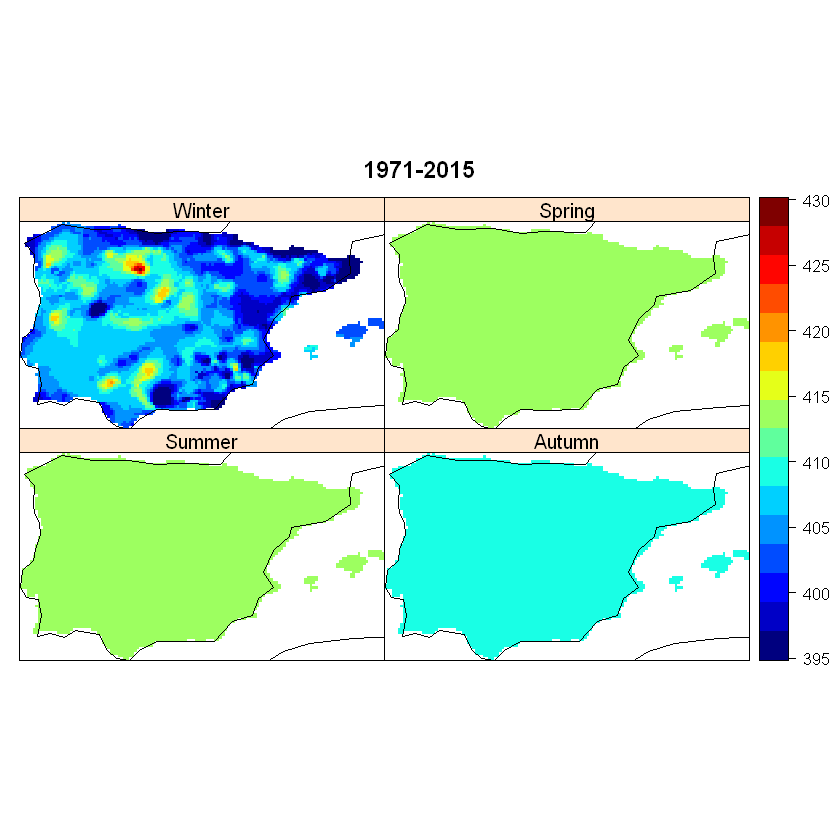

In [43]:
spatialPlot(tmax, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE, main = "1971-2015")

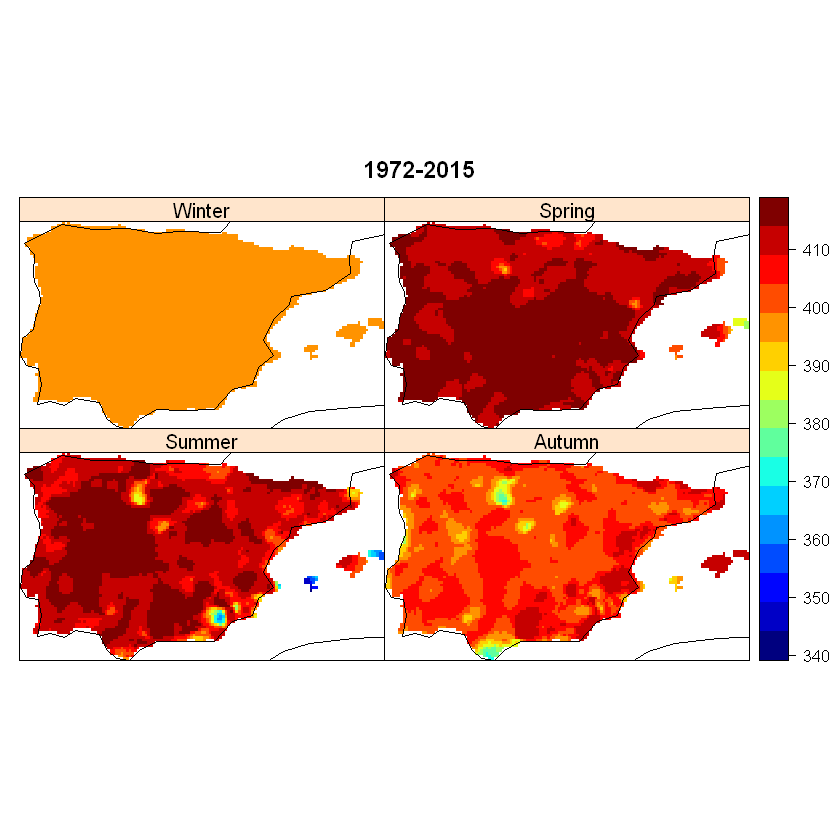

In [37]:
spatialPlot(tmax, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE, main = "1972-2015")

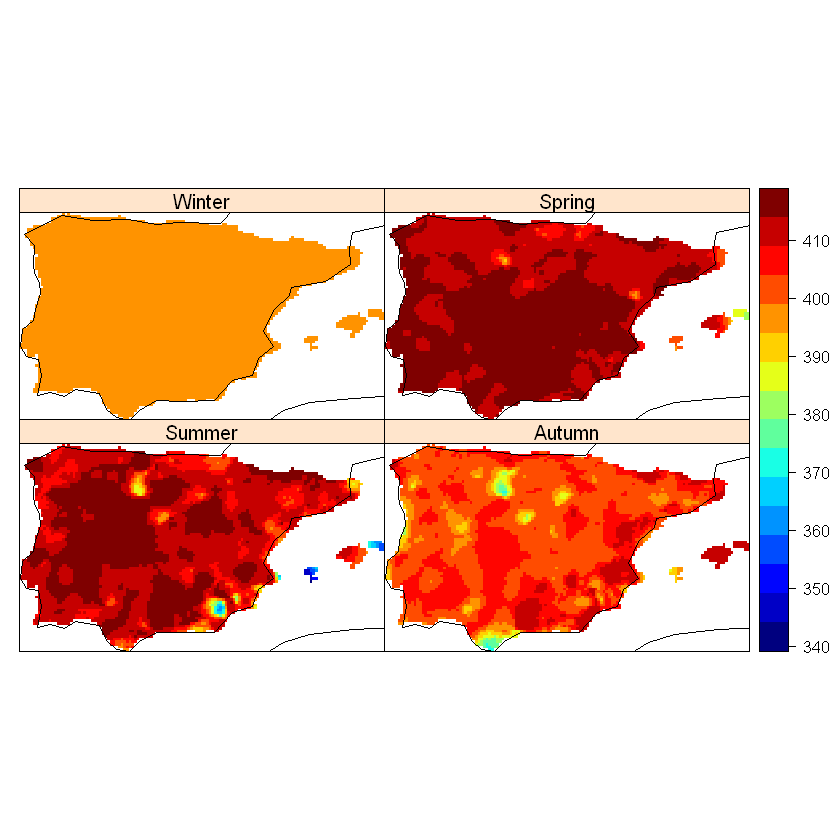

In [56]:
spatialPlot(tmax, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

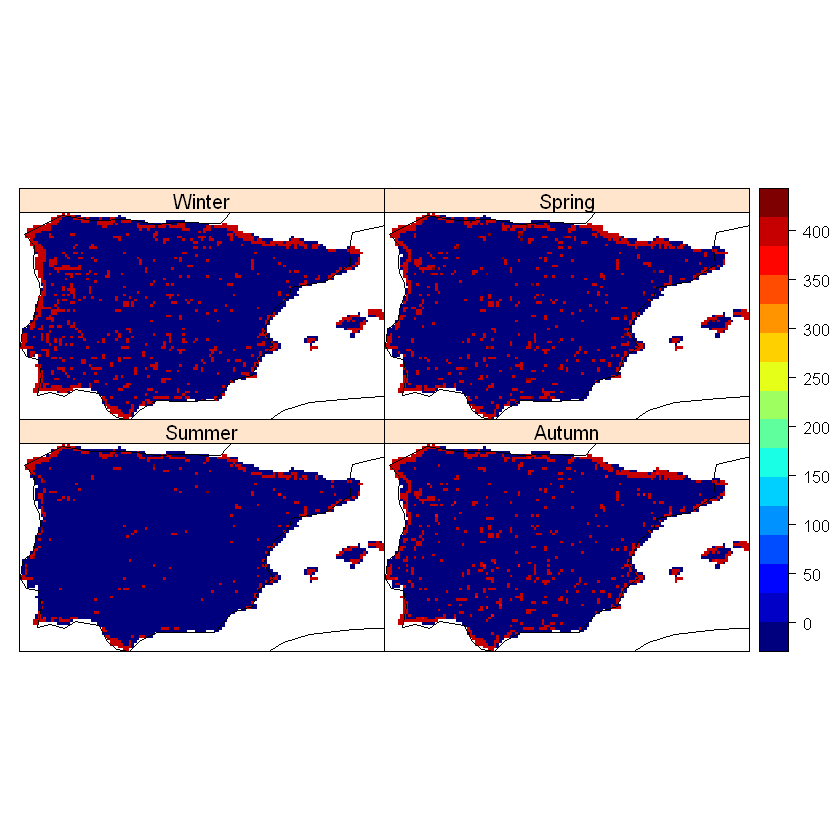

In [13]:
spatialPlot(pr, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

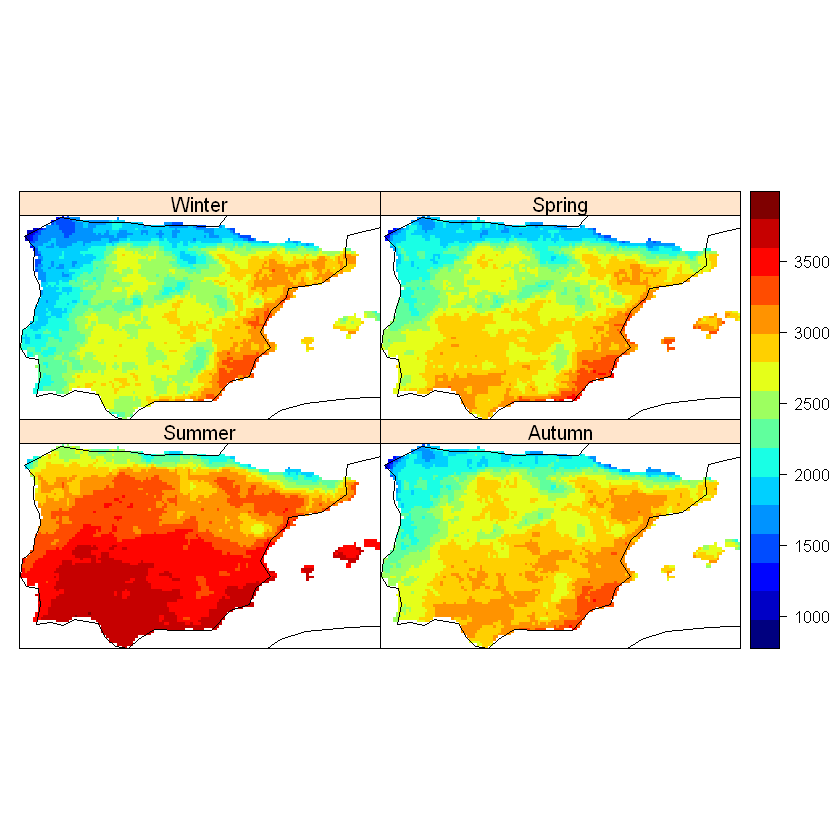

In [14]:
spatialPlot(pr_h, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

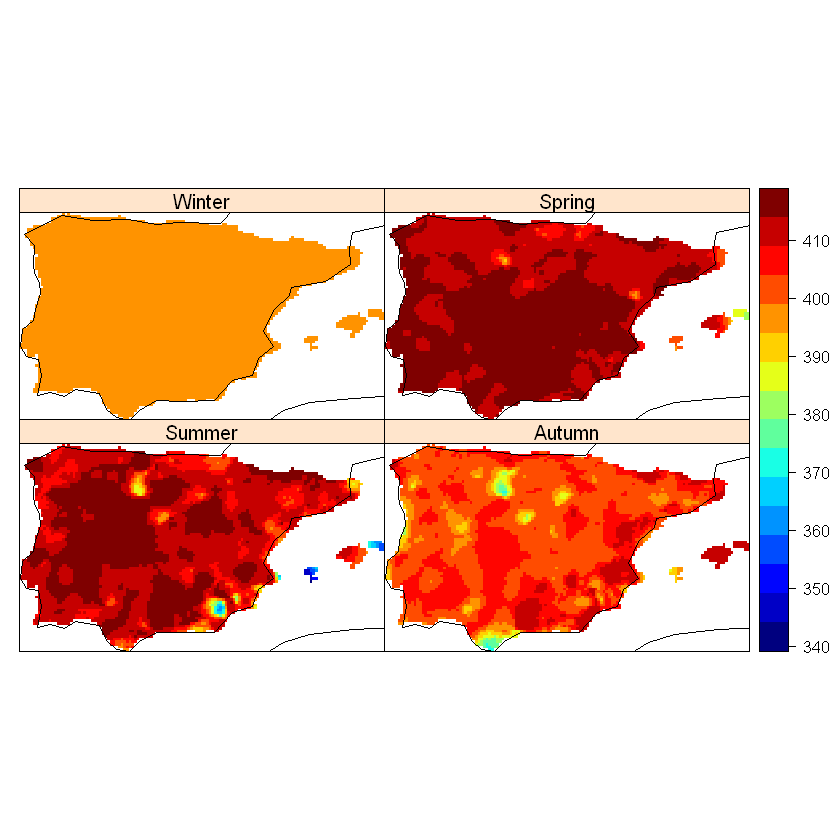

In [21]:
spatialPlot(tmax, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

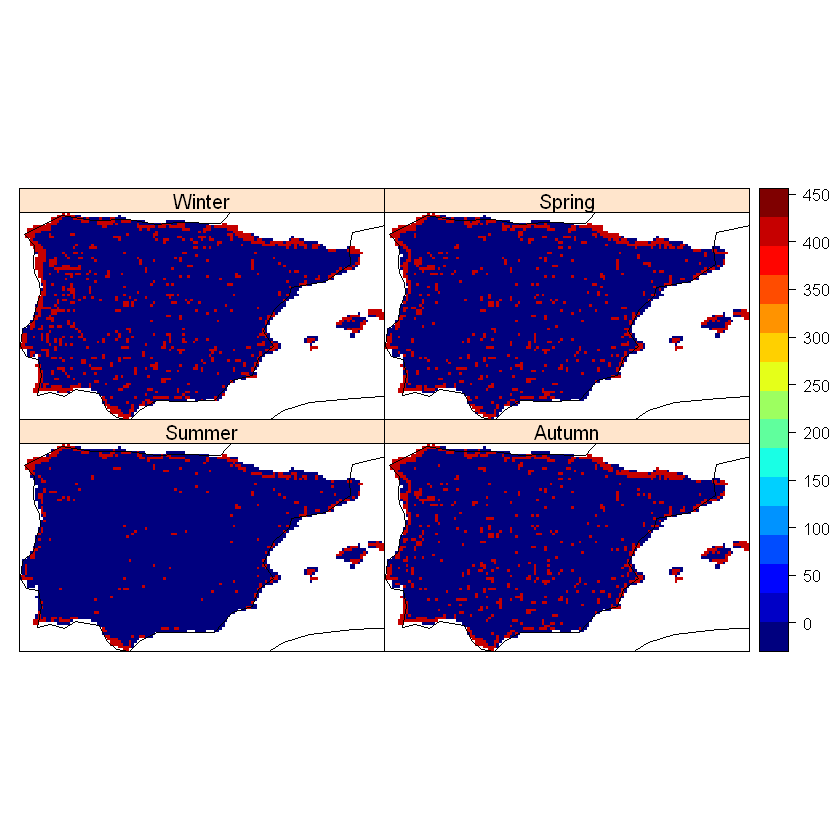

In [65]:
spatialPlot(pr, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

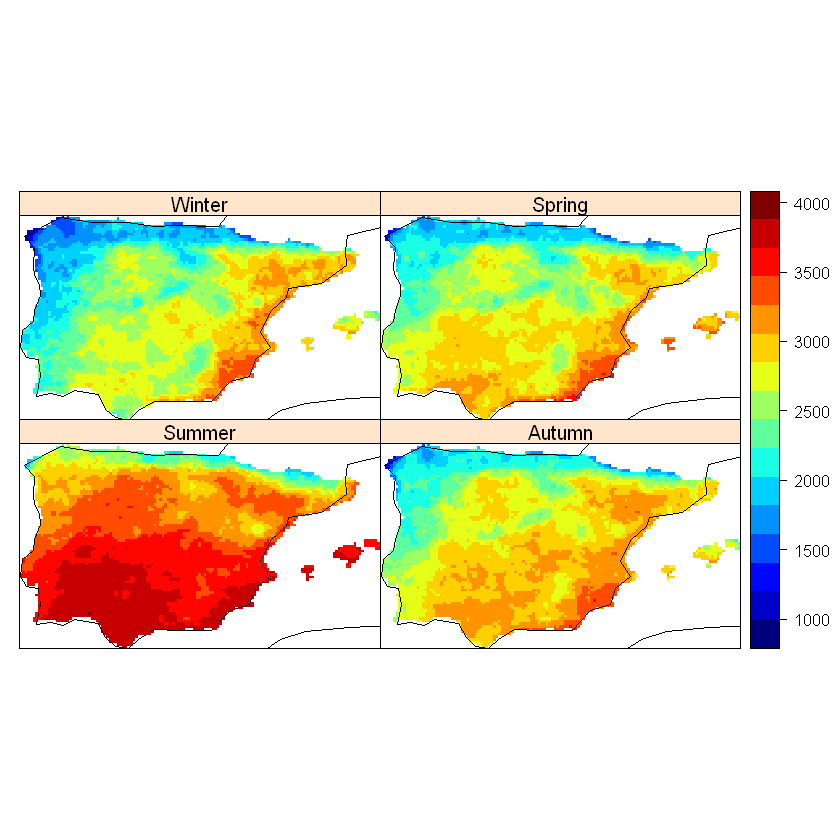

In [66]:
spatialPlot(pr_h, backdrop.theme = "coastline", color.theme = "jet.colors", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)